## Lesson 2.2: Guided Practice

In [20]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

First, let's import our data. We'll be using *Iris* again for this exercise. 

In [21]:
iris = pd.read_csv("../../assets/datasets/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

As in 2.1, let's split the set into two parts. "X" will be the data and "Y" will be the class labels.

In [22]:
X = iris.loc[:,:"PetalWidth"]
y = iris.loc[:,"Name"]

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

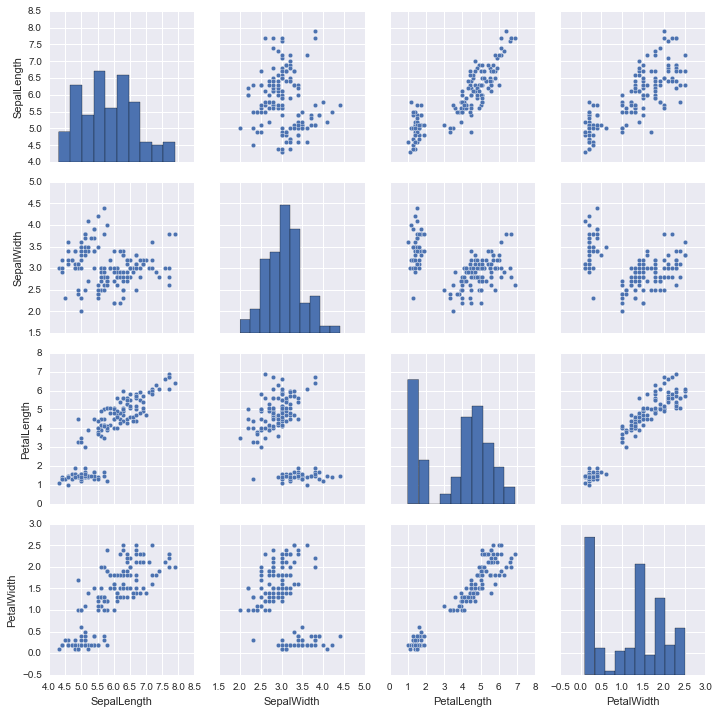

In [23]:
sns.pairplot(X)

## Step 3: Covariance Matrix

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [55]:
X_standard = StandardScaler().fit_transform(X)
X_standard

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [56]:
X_standard.T

array([[ -9.00681170e-01,  -1.14301691e+00,  -1.38535265e+00,
         -1.50652052e+00,  -1.02184904e+00,  -5.37177559e-01,
         -1.50652052e+00,  -1.02184904e+00,  -1.74885626e+00,
         -1.14301691e+00,  -5.37177559e-01,  -1.26418478e+00,
         -1.26418478e+00,  -1.87002413e+00,  -5.25060772e-02,
         -1.73673948e-01,  -5.37177559e-01,  -9.00681170e-01,
         -1.73673948e-01,  -9.00681170e-01,  -5.37177559e-01,
         -9.00681170e-01,  -1.50652052e+00,  -9.00681170e-01,
         -1.26418478e+00,  -1.02184904e+00,  -1.02184904e+00,
         -7.79513300e-01,  -7.79513300e-01,  -1.38535265e+00,
         -1.26418478e+00,  -5.37177559e-01,  -7.79513300e-01,
         -4.16009689e-01,  -1.14301691e+00,  -1.02184904e+00,
         -4.16009689e-01,  -1.14301691e+00,  -1.74885626e+00,
         -9.00681170e-01,  -1.02184904e+00,  -1.62768839e+00,
         -1.74885626e+00,  -1.02184904e+00,  -9.00681170e-01,
         -1.26418478e+00,  -9.00681170e-01,  -1.50652052e+00,
        

Now, let's set up our data for decomposition by creating a covariance matrix

In [35]:
cov_mat = np.cov(X_standard.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Decompose the the covariance matrix to find the eigenvalues

In [29]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

## Step 4. Eigenvalues and Eigenvectors

In [30]:
eigenValues, eigenVectors

(array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

**Question**: What is the relationship between these eigenvectors/values and the covariance matrix? 

Calculate the Eigen Pairs using the method we just learned

In [57]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs

[(2.9303537755893192,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734124,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163986,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995595971,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

Now, sort the eigenpairs from highest to lowest

In [38]:
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print i[0]

2.93035377559
0.927403621517
0.148342226482
0.0207460139956


## Explained Variance

In [39]:
eigenSum = sum(eigenValues)
eigenSum

4.0268456375838957

Now, calculate the explained variance and the Cumulative explained variance

In [40]:
ExpVar = [(i / eigenSum)*100 for i in sorted(eigenValues, reverse=True)]
cumulativeExpVar = np.cumsum(ExpVar)

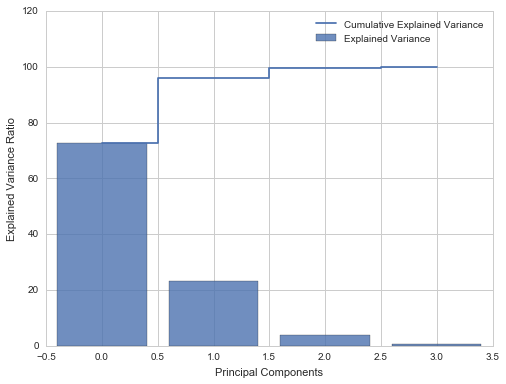

In [50]:
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(8,6))
    
    plt.bar(range(4), ExpVar, alpha=0.8, align="center",
           label="Explained Variance")
    plt.step(range(4), cumulativeExpVar, where="mid",
           label="Cumulative Explained Variance")
    plt.ylabel("Explained Variance Ratio")
    plt.xlabel("Principal Components")
    plt.legend(loc="best")
    plt.tight_layout

## Projection Matrix

Create the projection Matrix - Note: when calling "reshape," the x length "4" corresponds to the length of the data attributes

In [41]:
Pmatrix = np.hstack((eigenPairs[0][1].reshape(4,1),
                    eigenPairs[1][1].reshape(4,1)))
Pmatrix

array([[-0.37231836, -0.37231836],
       [-0.92555649, -0.92555649],
       [-0.02109478, -0.02109478],
       [-0.06541577, -0.06541577]])

Calculate the dot product for the projection

In [42]:
y = X_standard.dot(Pmatrix)

In [43]:
print y
y.shape

[[ -5.05703903e-01  -5.05703903e-01]
 [  6.55404729e-01   6.55404729e-01]
 [  3.18477311e-01   3.18477311e-01]
 [  5.75367713e-01   5.75367713e-01]
 [ -6.74767397e-01  -6.74767397e-01]
 [ -1.51854856e+00  -1.51854856e+00]
 [ -7.45626750e-02  -7.45626750e-02]
 [ -2.47613932e-01  -2.47613932e-01]
 [  1.09514636e+00   1.09514636e+00]
 [  4.48629048e-01   4.48629048e-01]
 [ -1.07059558e+00  -1.07059558e+00]
 [ -1.58587455e-01  -1.58587455e-01]
 [  7.09118158e-01   7.09118158e-01]
 [  9.38281982e-01   9.38281982e-01]
 [ -1.88997851e+00  -1.88997851e+00]
 [ -2.72237108e+00  -2.72237108e+00]
 [ -1.51375028e+00  -1.51375028e+00]
 [ -5.14304308e-01  -5.14304308e-01]
 [ -1.43111071e+00  -1.43111071e+00]
 [ -1.15803343e+00  -1.15803343e+00]
 [ -4.30465163e-01  -4.30465163e-01]
 [ -9.52457317e-01  -9.52457317e-01]
 [ -4.89517027e-01  -4.89517027e-01]
 [ -1.06750793e-01  -1.06750793e-01]
 [ -1.62186163e-01  -1.62186163e-01]
 [  6.07892567e-01   6.07892567e-01]
 [ -2.66014312e-01  -2.66014312e-01]
 

(150, 2)

## Scitkit Alternative

In [45]:
pcask = PCA(n_components=2)
y_sk = pcask.fit_transform(X_standard)
y_sk

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -